<h1 style="background-color:Green;font-size:36pt;color:white">Data Visualization </h1>

## Giusseppe Benito Bervis Quintero
### León, Nicaragua - 2022

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Exploring Datasets with *pandas*](#0)<br>
2. [Plotting using Pandas](#12)

</div>


# 1. Exploring the Dataset with Pandas

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

![Data Preview](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%201/images/DataSnapshot.png)

The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01">here</a>.

In [36]:
# Uploading necesary packages
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# Uploading packages for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot']) # optional: for ggplot-like style

In [3]:
# Importing the dataset
df_can = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), nrows = 195, usecols = "A:AQ",
     engine='openpyxl')
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
# Looking a short summary of the dataset
df_can.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


Let's clean the dataset to remove a few unnecesary columns and rename the columns so that they make sense

In [6]:
# Removing some columns
df_can.drop(['Type','Coverage', 'AREA','REG','DEV'], axis = 1, inplace = True)

# Rename some columns
df_can.rename(columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace = True)

# Looking at the dataset columns
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [11]:
# Counting the number of NaN values
df_can.isnull().sum().sum()

0

As we can see, there is not any NaN value in the dataset.

Let's take a look over the statistics of the data.

In [12]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000


# 2. Plotting using *pandas*

Documentation:

*   [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01#plotting)<br>
*   [Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01#api-dataframe-plotting)

**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort:

In [ ]:
# Seting the countrie's name as index
df_can.set_index('Country', inplace=True)

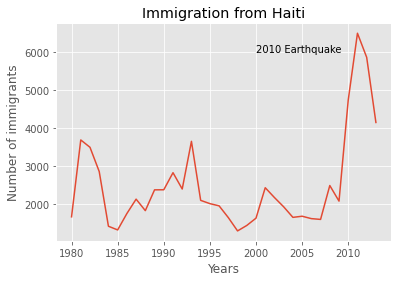

In [45]:
# Taking values for inmigration in every year
haiti = df_can.loc['Haiti', range(1980, 2014)]

# Plotting
haiti.plot(kind='line')

# Labels
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

# An annotation for earthquake
plt.text(2000, 6000, '2010 Earthquake')

plt.show() # need this line to show the updates made to the figure

Let's compare the number of immigrants from India and China from 1980 to 2013.

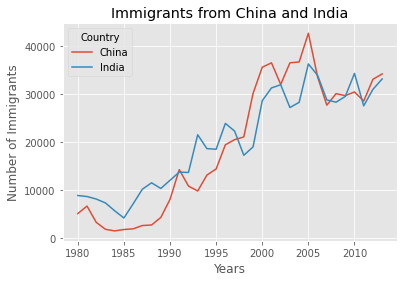

In [49]:
# Taking data and transposing it
df_CI = df_can.loc[['China','India'], range(1980,2014)].transpose()

# Labels
df_CI.plot(kind = 'line')
plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

 Compare the trend of top 5 countries that contributed the most to immigration to Canada.

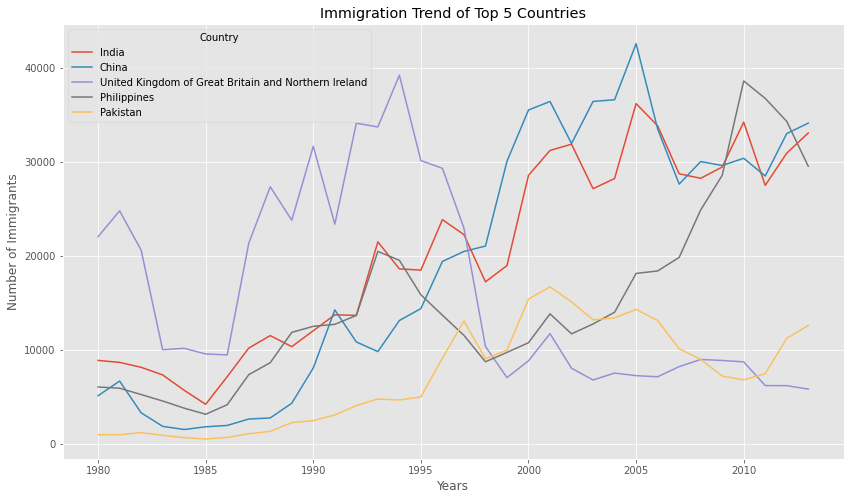

In [58]:
# Calculating the total of inmigrants contribution by country
df_can['Total'] = df_can[range(1980, 2014)].sum(axis = 1)

# Sorting the data by the contribution of inmigrants
df_sorted = df_can.sort_values(by = 'Total', ascending = False)

# Getting the top 5 entries
df_top5 = df_sorted[range(1980, 2014)].head().transpose()

# Plotting
df_top5.plot(kind = 'line', figsize = (14, 8))

# Labels
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()